In [279]:
%reset8

Once deleted, variables cannot be recovered. Proceed (y/[n])? y




A GP is fully specified by a mean function and a covariance function:


Given training data {(x,y)} where y=f(x).

Goal: estimate the hidden function f so we can predicte f(x*) for any new unobserved input x*. 

Using Gaussian process, a function can be modeled using an infinite dimensional multivariate Gaussian distribution. In other words, every point in the input space is associated with a random variable (Univariate Gaussian) and the joint distribution of these infinite random variables is modeled as a multivariate Gaussian (MVG). in practise, the input space contians both training and test inputs over which the joint distribution is given as: P(y,y*|x,x*).  

GP can be used to perform a regression task by exploiting the wonderful properties of the MVG such as marginalization and conditioning. 

The joint distribution of the output over training and test data P(y,y*|x, x*) is MVG. 

p(y∗|x∗,x,y)=N(y∗|μ∗,Σ∗)
μ∗=m(x∗)+K.T∗inv(K)(y−m(x))
Σ∗=K∗∗−K.T∗inv(K).K∗

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show

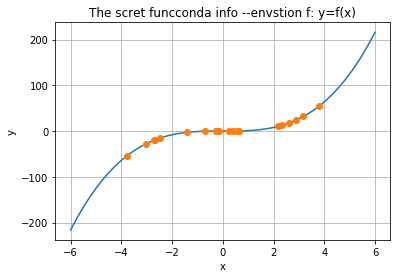

In [16]:
# Toy data: 1D data
# Let us generate the training data using a 3th order polynomial. Note that the data is clean i.e not noisy
coefs = [0, 0, 0, 1]
def f(x):
    total = 0
    for exp, coef in enumerate(coefs):
        total += coef * (x ** exp)
    return total

xs = np.linspace(-6.0, 6., 100)
ys = f(xs)

plt.plot(xs, ys)
plt.title('The scret funcconda info --envstion f: y=f(x)')
plt.xlabel('x')
plt.ylabel('y')

N=20
x_train=np.random.uniform(low=-4, high=4, size=(N,))
y_train=x_train**3#np.random.normal(0,9, N)
plt.plot(x_train, y_train, 'o')
plt.grid(True)


In [17]:
def cov_kernel(a,b,param):
    sq_dist=np.subtract.outer(a,b).squeeze()**2
    return 100.*np.exp(-.5 * (1/param)*sq_dist)



In [55]:
# Test data
x_test = np.linspace(-6., 6., 100)
C22=cov_kernel(x_test,x_test,0.01)

In [56]:
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)


Using the marginalization property of the MVG, P(y*|x*) can be modelled as a MVG with mean mu(x*) and covariance C22. we draw 10 samples from the prior gaussian process (MVG). The constructing property is used here: if X ~ N(mu, C) ==> 
x= mu + A N(0, I). where C=A.AT. All we need to do is sampling from N(0,I) and subtitute in the linear equation. we sample 80 samples here. 

In [57]:
A= np.linalg.cholesky(C22 + 1e-20*np.eye(len(x_test)))

In [58]:
y_test_prior = np.dot(A, np.random.normal(size=(len(x_test),10)))

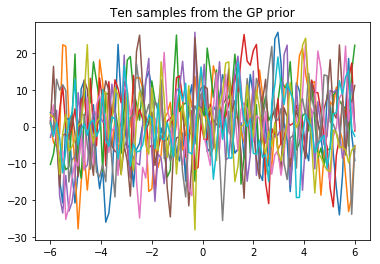

In [59]:
plt.plot(x_test, y_test_prior)
#plt.axis([-5, 5, -5, 5])
plt.title('Ten samples from the GP prior')
plt.show()


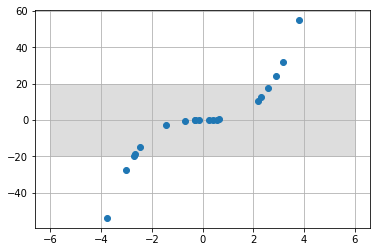

In [60]:
s = np.diag(C22)
stdv = np.sqrt(s)
plt.gca().fill_between(x_test.flat, -2*stdv, +2*stdv, color="#dddddd")
plt.plot(x_train, y_train, 'o')
plt.grid(True)
plt.show()

In [61]:
params=0.1
C11 = cov_kernel(x_train, x_train, params)
C21= cov_kernel(x_test, x_train, params)
C22= cov_kernel(x_test, x_test, params)

mu = C21.dot(np.linalg.inv(C11)).dot(y_train)
sigma = C22 - C21.dot(np.linalg.inv(C11)).dot(C21.T)


(-100, 100)

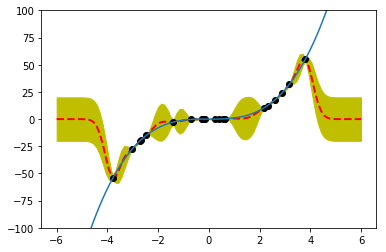

In [62]:
s2 = np.diag(sigma)
stdv = np.sqrt(s2)
plt.gca().fill_between(x_test.flat, mu-2*stdv, mu+2*stdv, color="y")
plt.plot(x_test, mu, 'r--', lw=2)
plt.plot(x_train, y_train, 'ok')
plt.plot(xs, ys)
plt.ylim([-100,100])

In [755]:
x_test.shape

(100,)